In [1]:
import cv2
from pylab import *
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
import random

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

Path to dataset files: /Users/dianaterraza/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5


In [3]:
# Load the dataset
import pandas as pd
import numpy as np

data = pd.read_csv(path + "/A_Z Handwritten Data.csv")

In [4]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(372450, 785)

Change the name of the columns 

In [6]:
data.columns = ['label'] + [f'pixel{i}' for i in range(784)]
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = data.sample(frac=1).reset_index(drop=True) #index is from 0 to len(data)
train = data.iloc[:250000, :]
test = data.iloc[250000:350000,:].reset_index(drop=True)

In [8]:
letters = [chr(x) for x in range(65, 91)]
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [9]:
len(letters)

26

In [10]:
train['label'].value_counts().shape

(26,)

Text(0.5, 1.0, 'Test Frequency')

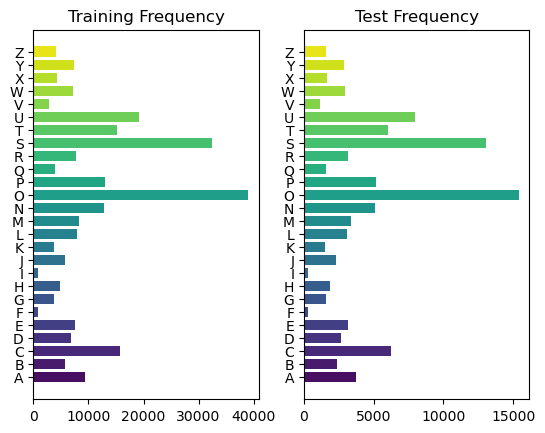

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.barh(letters, train['label'].value_counts().sort_index(),
         color = sns.color_palette('viridis', 26))
ax1.set_title('Training Frequency')

ax2.barh(letters, test['label'].value_counts().sort_index(),
         color = sns.color_palette('viridis', 26))
ax2.set_title('Test Frequency')

Split the data

In [12]:
train_x, train_y = train.drop('label', axis=1), train['label']
test_x, test_y = train.drop('label', axis=1), train['label']

In [13]:
28*28

784

In [14]:
train.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


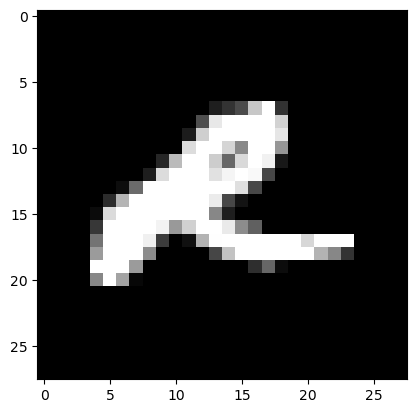

In [15]:
rownum = 101018

pixels = train.iloc[rownum][1:].values.reshape(28,28)
array = np.array(pixels, dtype = np.uint8)
img = Image.fromarray(array)
plt.imshow(img, cmap = 'grey')
plt.show()

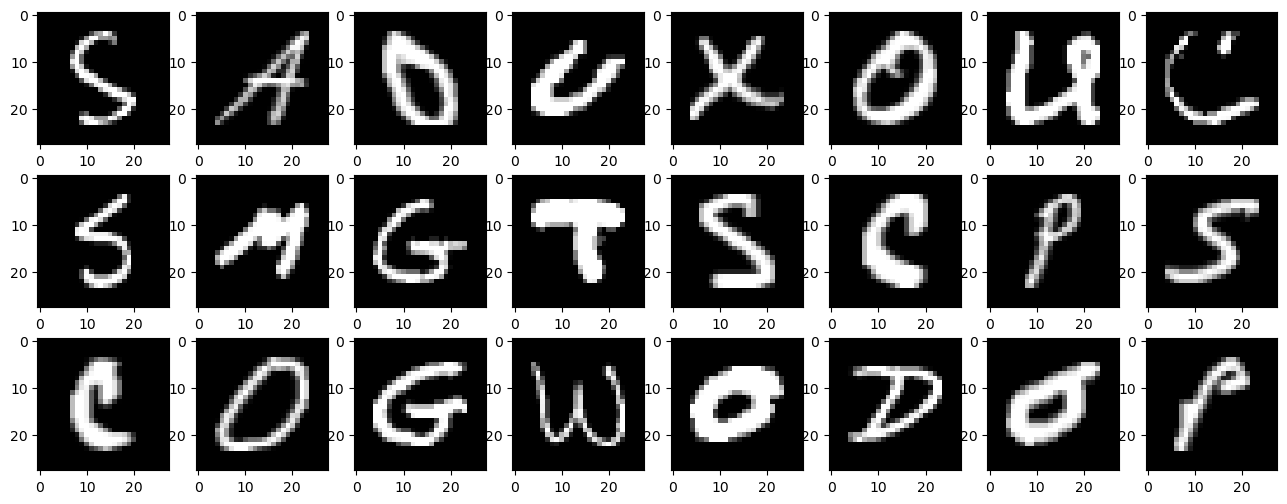

In [16]:
from os import replace
random_indices = np.random.choice(range(len(train)), size = 24, replace = False)

fig, axes = plt.subplots(3,8, figsize=(16,6))

for i, ax in enumerate(axes.ravel()): # ravel is flatten the 3x8 matrix 
  ax.imshow(train.iloc[random_indices[i]][1:].values.reshape(28,28), cmap = 'grey')
plt.show()

In [17]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train['label'].nunique() # 26 unique labels the letters in the english alphhabet

26

Scale the data , values between 0 to 1, grey scale 0-255, but before that we hace to reshape the data:

In [19]:
train_x.values.reshape(-1, 28, 28, 1).shape

(250000, 28, 28, 1)

I'm adding a extra dimension (1)

number of samples 2500000

from 2d representations (28x28)

Channel = 1 bc is gray scale, if we have RGB then  is 3 channesl for every image

In [20]:
train_x = train_x.values.reshape(-1, 28, 28,1)


test_x = test_x.values.reshape(-1, 28, 28,1)
test_x = test_x / 255.0 #scaling

Broadcasting : justing matrices and arrays to different sizes, change the shape of the arrays, 784 can broadcasted to 28*28 

Broadcasting is the hability of numpy matrices and arrays to reshape 

### Transform the Y into one hot coding representation 

In [21]:
train_y = tf.keras.utils.to_categorical(train_y, 26)
train_y.shape

(250000, 26)

In [22]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [23]:
train_y[0].argmax() #returns the index of the max value

20

In [24]:
letters[20]

'U'

In [25]:
np.array([1,2,10,4]).max()

10

In [26]:
np.array([1,2,10,4]).argmax() # returns the index of the max value

2

Maxpooling 2D will take the maximum value 

### Creating my neural network : 

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2)),
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2)),
    
    #squeeze whethever we have left
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(26, activation = 'softmax')
    
])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,018 (753.98 KB)

 Trainable params: 193,018 (753.98 KB)

 Non-trainable params: 0 (0.00 B)

None corresponds to the number of samples, we dont specify any, is the batch size 

In [28]:
train_x.shape

(250000, 28, 28, 1)

### We do compile, we have to provide the early stopping:

For run the code a bit faster: using GPU Graphics Processing Units

In [36]:
'''''
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

'''

'\'\'\nimport tensorflow as tf\nprint("Num GPUs Available:", len(tf.config.list_physical_devices(\'GPU\')))\n\n'

In [37]:
'''''
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')
'''''

"''\nfrom tensorflow.keras.mixed_precision import set_global_policy\nset_global_policy('mixed_float16')\n"

In [38]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 5,
                               min_delta = 0.0001,
                               restore_best_weights = True)
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

history = model.fit(
    train_x, train_y,
    validation_split = 0.2,
    callbacks = [early_stopping],
    epochs = 25,
    batch_size = 50
)

Epoch 1/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.9884 - loss: 0.0433 - val_accuracy: 0.9848 - val_loss: 0.0702
Epoch 2/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.9889 - loss: 0.0416 - val_accuracy: 0.9847 - val_loss: 0.0636
Epoch 3/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 86s 21ms/step - accuracy: 0.9899 - loss: 0.0376 - val_accuracy: 0.9868 - val_loss: 0.0593
Epoch 4/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 94s 24ms/step - accuracy: 0.9898 - loss: 0.0370 - val_accuracy: 0.9868 - val_loss: 0.0638
Epoch 5/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 99s 25ms/step - accuracy: 0.9892 - loss: 0.0391 - val_accuracy: 0.9841 - val_loss: 0.0751
Epoch 6/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 101s 25ms/step - accuracy: 0.9887 - loss: 0.0424 - val_accuracy: 0.9818 - val_loss: 0.0743
Epoch 7/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 103s 26ms/step - accuracy: 0.9888 - loss: 0.0430 - val_accuracy: 0.9870 - val_loss: 0.0749
Epoch 8/25
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 97s 24ms/step - accuracy: 0.9898

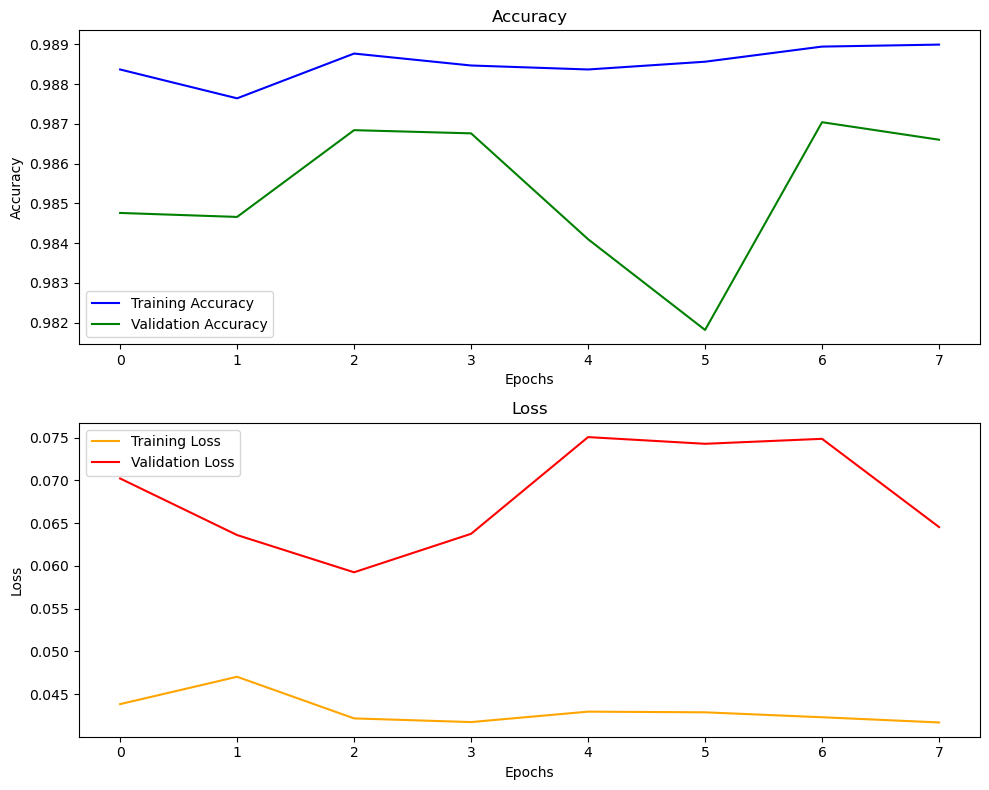

In [42]:
history_df = pd.DataFrame(history.history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(history_df['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history_df['val_accuracy'], label='Validation Accuracy', color='green')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history_df['loss'], label='Training Loss', color='orange')
ax2.plot(history_df['val_loss'], label='Validation Loss', color='red')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()




plt.tight_layout()
plt.show()

In [48]:
result = model.predict(test_x)
result = np.argmax(result,axis = 1)
result = pd.Series(result,name='Label')
result

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step


0         20
1         13
2         23
3         13
4         12
          ..
249995     0
249996    24
249997    13
249998    15
249999    24
Name: Label, Length: 250000, dtype: int64

In [49]:
print(len(test))  # Check the length of test

100000


In [50]:
index = random.randint(0, len(test) - 1)

In [51]:
print(len(letters)) 

26


In [52]:
print(test.shape)

(100000, 785)


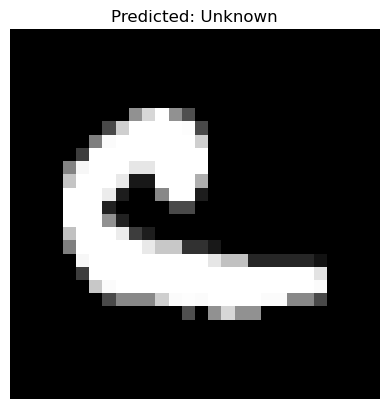

In [53]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ensure index is within range
index = random.randint(0, len(test) - 1)

pixinfo = test.iloc[index, 1:].values.reshape(28, 28)  # Ensure test has at least 2 columns
array = np.array(pixinfo, dtype=np.uint8)
img = Image.fromarray(array)

plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.title(f'Predicted: {letters[index] if index < len(letters) else "Unknown"}')
plt.show()


In [54]:
wrong_predictions = np.where(result != test_y)[0]
right_predictions = np.where(result == test_y)[0]
print(f"{wrong_predictions.shape[0]} Incorrect out of 100,000")

132074 Incorrect out of 100,000


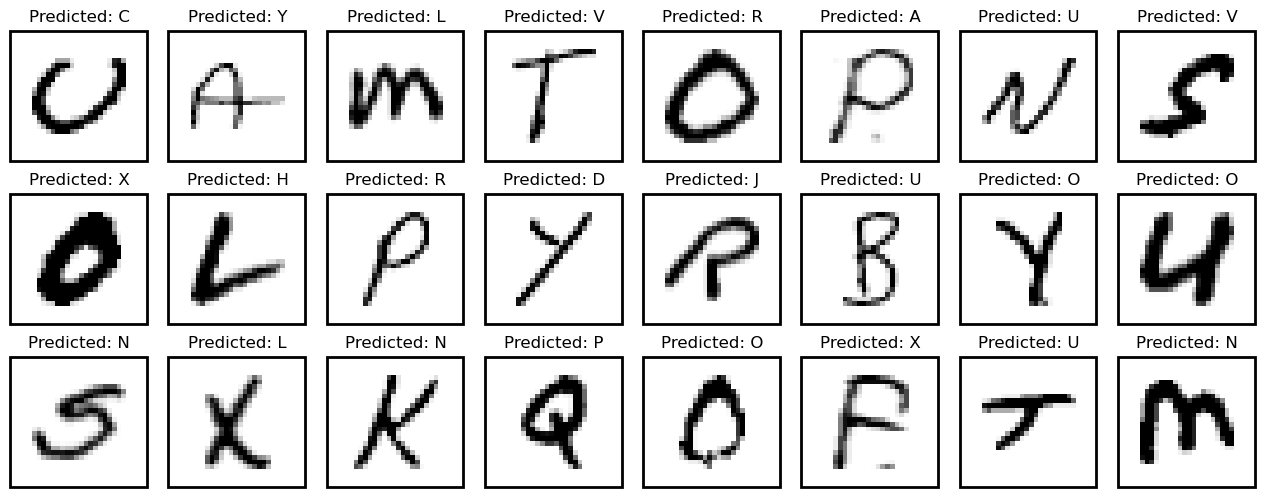

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Ensure right_predictions are within range
right_predictions = [i for i in right_predictions if i < len(test)]

# Shuffle safely
np.random.shuffle(right_predictions)
right_predictions = right_predictions[:min(24, len(right_predictions))]  # Ensure 3x8 images

_, axes = plt.subplots(3, 8, figsize=(16, 6))

for i, ax in enumerate(axes.ravel()):
    if i >= len(right_predictions):  
        ax.axis('off')  # Hide extra subplots if predictions are fewer
        continue

    img_index = right_predictions[i]
    img_data = test.iloc[img_index, 1:].values.reshape(28, 28)  # Fix indexing

    ax.imshow(img_data, cmap='Greys')
    ax.axis('off')
    ax.set_title(f'Predicted: {chr(result[img_index] + 65)}')

    # Add a rectangle
    autoAxis = ax.axis()
    rec = Rectangle((autoAxis[0]-0.7, autoAxis[2]-0.2),
                    (autoAxis[1]-autoAxis[0])+1,
                    (autoAxis[3]-autoAxis[2])+0.4,
                    fill=False, lw=2)
    ax.add_patch(rec)
    rec.set_clip_on(False)

plt.show()
